<a href="https://colab.research.google.com/github/yandod/colaboratory_notes/blob/main/Covid19Setagaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリの読み込み

In [7]:
!pip install japanize-matplotlib
import pandas as pd
import urllib.request
import json
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.dates as mdates

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


githubからJsonを読み込みとりあえず表示

In [8]:
json_raw = ''
data = None
with urllib.request.urlopen('https://raw.githubusercontent.com/yandod/covid19-setagaya/main/data/output.json') as url:
  json_raw = url.read().decode()
  data = json.loads(json_raw)
  pprint.pprint(data['data'][:1])

[{'confirmed_cases': '149654',
  'confirmed_cases_age_0_9': '17861',
  'confirmed_cases_age_100_109': '67',
  'confirmed_cases_age_10_19': '16129',
  'confirmed_cases_age_20_29': '32490',
  'confirmed_cases_age_30_39': '25322',
  'confirmed_cases_age_40_49': '23070',
  'confirmed_cases_age_50_59': '14274',
  'confirmed_cases_age_60_69': '6023',
  'confirmed_cases_age_70_79': '3591',
  'confirmed_cases_age_80_89': '2311',
  'confirmed_cases_age_90_99': '1026',
  'confirmed_cases_age_unknown': '8',
  'confirmed_cases_female': '70792',
  'confirmed_cases_male': '71380',
  'cured': '126475',
  'date': '2022-07-29',
  'deaths': '217',
  'home_care': '22380',
  'hotel_care': '74',
  'inpatient_care': '508',
  'updated_date': '7月28日現在'}]


pandasでも読み込み

In [9]:
po = pd.read_json(json.dumps(data['data']))
po

,date,updated_date,confirmed_cases,inpatient_care,hotel_care,home_care,cured,deaths,confirmed_cases_male,confirmed_cases_female,...,confirmed_cases_age_20_29,confirmed_cases_age_30_39,confirmed_cases_age_40_49,confirmed_cases_age_50_59,confirmed_cases_age_60_69,confirmed_cases_age_70_79,confirmed_cases_age_80_89,confirmed_cases_age_90_99,confirmed_cases_age_100_109,confirmed_cases_age_unknown
0,2022-07-29,7月28日現在,149654,508,74,22380,126475,217,71380,70792,...,32490,25322,23070,14274,6023,3591,2311,1026,67,8
1,2022-07-28,7月27日現在,147318,496,79,20959,125572,212,71380,70792,...,32490,25322,23070,14274,6023,3591,2311,1026,67,8
2,2022-07-27,7月26日現在,143913,475,108,18908,124210,212,71380,70792,...,32490,25322,23070,14274,6023,3591,2311,1026,67,8
3,2022-07-26,7月25日現在,142172,463,108,17204,124185,212,71380,70792,...,32490,25322,23070,14274,6023,3591,2311,1026,67,8
4,2022-07-25,7月22日現在,136279,423,353,16962,118329,212,64261,62872,...,29559,22835,20519,12497,5223,3119,2003,901,62,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022-04-10,NaN,90740,638,132,5452,84318,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1
106,2022-04-09,NaN,90740,638,132,5452,84318,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1
107,2022-04-08,NaN,90740,638,132,5452,84318,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1
108,2022-04-07,NaN,90200,617,144,5138,84101,200,45513,43472,...,21612,16218,14263,8652,3662,2256,1523,671,40,1


グラフにする

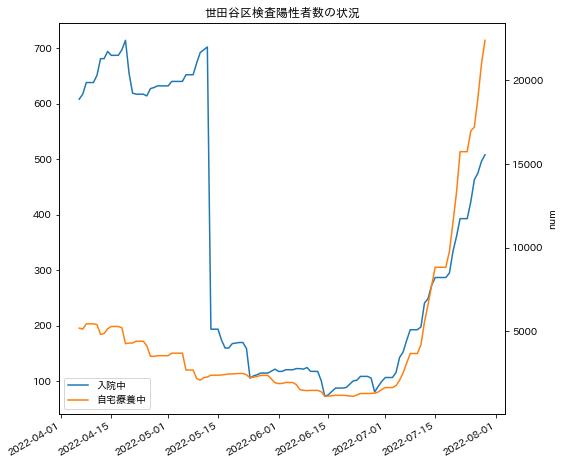

In [10]:
po = pd.read_json(json.dumps(data['data']))
fig, axes_inpatient = plt.subplots()

axes_inpatient.plot(po.iloc[:,0], po.iloc[:,3] ,'C0', label='入院中')
axes_home = axes_inpatient.twinx()
axes_home.plot(po.iloc[:,0], po.iloc[:,5] ,'C1', label='自宅療養中')

# 凡例をまとめる
h1, l1 = axes_inpatient.get_legend_handles_labels()
h2, l2 = axes_home.get_legend_handles_labels()
axes_inpatient.legend(h1+h2, l1+l2, loc='lower left')

myFmt = mdates.DateFormatter('%Y-%m-%d')
axes_inpatient.xaxis.set_major_formatter(myFmt)
axes_home.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

fig.set_size_inches(8,8)
plt.title('世田谷区検査陽性者数の状況')
plt.xlabel('date')
plt.ylabel('num')
plt.show()

年代ごとの数値のプロット

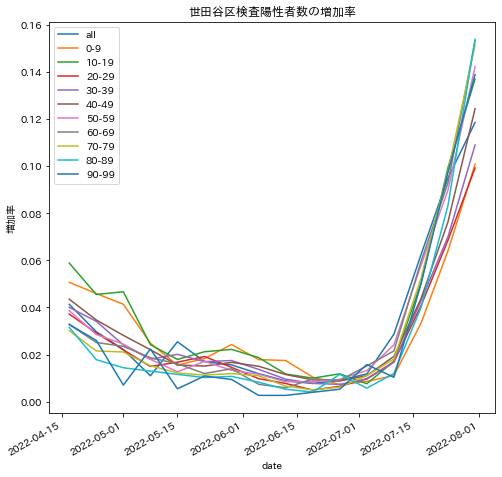

In [11]:
po = pd.read_json(json.dumps(data['data']))
po.set_index('date', inplace=True)

fig, axes_age = plt.subplots()

plt.plot(po['confirmed_cases'].resample('W').max().pct_change(), label='all')
axes_age.plot(po['confirmed_cases_age_0_9'].resample('W').max().pct_change(), label='0-9')
axes_age.plot(po['confirmed_cases_age_10_19'].resample('W').max().pct_change(), label='10-19')
axes_age.plot(po['confirmed_cases_age_20_29'].resample('W').max().pct_change(), label='20-29')
axes_age.plot(po['confirmed_cases_age_30_39'].resample('W').max().pct_change(), label='30-39')
axes_age.plot(po['confirmed_cases_age_40_49'].resample('W').max().pct_change(), label='40-49')
axes_age.plot(po['confirmed_cases_age_50_59'].resample('W').max().pct_change(), label='50-59')
axes_age.plot(po['confirmed_cases_age_60_69'].resample('W').max().pct_change(), label='60-69')
axes_age.plot(po['confirmed_cases_age_70_79'].resample('W').max().pct_change(), label='70-79')
axes_age.plot(po['confirmed_cases_age_80_89'].resample('W').max().pct_change(), label='80-89')
axes_age.plot(po['confirmed_cases_age_90_99'].resample('W').max().pct_change(), label='90-99')


myFmt = mdates.DateFormatter('%Y-%m-%d')
axes_age.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

fig.set_size_inches(8,8)

plt.title('世田谷区検査陽性者数の増加率')
plt.xlabel('date')
plt.ylabel('増加率')

plt.legend()
plt.show()

性別ごとの増加率

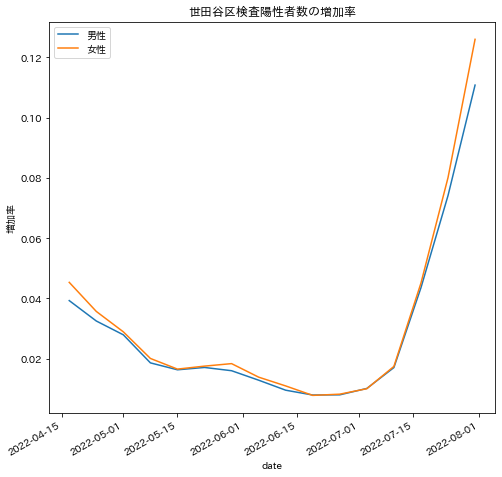

In [12]:
po = pd.read_json(json.dumps(data['data']))
po.set_index('date', inplace=True)

fig, axes_age = plt.subplots()

axes_age.plot(po['confirmed_cases_male'].resample('W').max().pct_change(), label='男性')
axes_age.plot(po['confirmed_cases_female'].resample('W').max().pct_change(), label='女性')


myFmt = mdates.DateFormatter('%Y-%m-%d')
axes_age.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

fig.set_size_inches(8,8)

plt.title('世田谷区検査陽性者数の増加率')
plt.xlabel('date')
plt.ylabel('増加率')

plt.legend()
plt.show()